In [104]:
import pandas as pd
df=pd.read_csv("MSFT.csv")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-12-12,247.449997,252.539993,247.169998,252.509995,250.290695,30665100
1,2022-12-13,261.690002,263.920013,253.070007,256.920013,254.661942,42196900
2,2022-12-14,257.130005,262.589996,254.309998,257.220001,254.959305,35410900
3,2022-12-15,253.720001,254.199997,247.339996,249.009995,246.821457,35560400
4,2022-12-16,248.550003,249.839996,243.509995,244.690002,242.539429,86102000
...,...,...,...,...,...,...,...
245,2023-12-04,369.100006,369.519989,362.899994,369.140015,369.140015,32063300
246,2023-12-05,366.450012,373.079987,365.619995,372.519989,372.519989,23065000
247,2023-12-06,373.540009,374.179993,368.029999,368.799988,368.799988,21182100
248,2023-12-07,368.230011,371.450012,366.320007,370.950012,370.950012,23118900


In [105]:
df=df[['Date','Close']]
df

,Date,Close
0,2022-12-12,252.509995
1,2022-12-13,256.920013
2,2022-12-14,257.220001
3,2022-12-15,249.009995
4,2022-12-16,244.690002
...,...,...
245,2023-12-04,369.140015
246,2023-12-05,372.519989
247,2023-12-06,368.799988
248,2023-12-07,370.950012


In [106]:
df['Date']

0      2022-12-12
1      2022-12-13
2      2022-12-14
3      2022-12-15
4      2022-12-16
          ...    
245    2023-12-04
246    2023-12-05
247    2023-12-06
248    2023-12-07
249    2023-12-08
Name: Date, Length: 250, dtype: object

In [107]:
import datetime

def str_to_datetime(s):
  split = s.split('-')
  year, month, day = int(split[0]), int(split[1]), int(split[2])
  return datetime.datetime(year=year, month=month, day=day)

datetime_object = str_to_datetime('1986-03-19')
datetime_object

datetime.datetime(1986, 3, 19, 0, 0)

In [108]:
df['Date']

0      2022-12-12
1      2022-12-13
2      2022-12-14
3      2022-12-15
4      2022-12-16
          ...    
245    2023-12-04
246    2023-12-05
247    2023-12-06
248    2023-12-07
249    2023-12-08
Name: Date, Length: 250, dtype: object

In [109]:
df['Date'] = df['Date'].apply(str_to_datetime)
df['Date']

<ipython-input-109-f6fc52bb0fa5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = df['Date'].apply(str_to_datetime)


0     2022-12-12
1     2022-12-13
2     2022-12-14
3     2022-12-15
4     2022-12-16
         ...    
245   2023-12-04
246   2023-12-05
247   2023-12-06
248   2023-12-07
249   2023-12-08
Name: Date, Length: 250, dtype: datetime64[ns]

In [110]:
df.index = df.pop('Date')
df

,Close
Date,
2022-12-12,252.509995
2022-12-13,256.920013
2022-12-14,257.220001
2022-12-15,249.009995
2022-12-16,244.690002
...,...
2023-12-04,369.140015
2023-12-05,372.519989
2023-12-06,368.799988


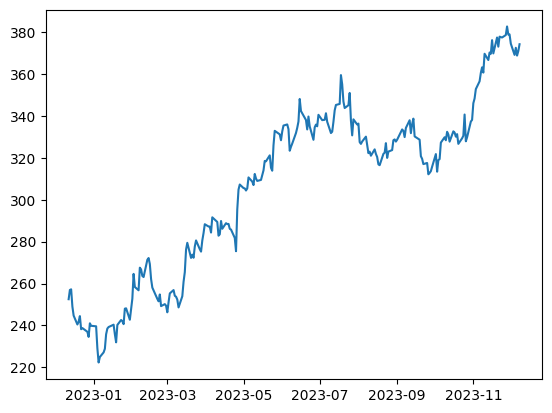

In [111]:
import matplotlib.pyplot as plt

plt.plot(df.index, df['Close'])

In [112]:
import numpy as np
import pandas as pd
import datetime

# Assuming you have a function to convert string to datetime
def str_to_datetime(date_str):
    return datetime.datetime.strptime(date_str, '%Y-%m-%d')

def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
    first_date = str_to_datetime(first_date_str)
    last_date = str_to_datetime(last_date_str)

    target_date = first_date

    dates = []
    X, Y = [], []

    last_time = False
    while True:
        df_subset = dataframe.loc[:target_date].tail(n + 1)

        if len(df_subset) != n + 1:
            print(f'Warning: Insufficient data for date {target_date}. Skipping...')
            target_date += datetime.timedelta(days=1)
            continue

        values = df_subset['Close'].to_numpy()
        x, y = values[:-1], values[-1]

        dates.append(target_date)
        X.append(x)
        Y.append(y)

        next_week = dataframe.loc[target_date:target_date + datetime.timedelta(days=7)]
        next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
        next_date_str = next_datetime_str.split('T')[0]
        year_month_day = next_date_str.split('-')
        year, month, day = year_month_day
        next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))

        if last_time:
            break

        target_date = next_date

        if target_date == last_date:
            last_time = True

    ret_df = pd.DataFrame({})
    ret_df['Target Date'] = dates

    X = np.array(X)
    for i in range(n):
        ret_df[f'Target-{n-i}'] = X[:, i]

    ret_df['Target'] = Y

    return ret_df

# Assuming 'df' is your DataFrame
windowed_df = df_to_windowed_df(df,
                                 '2022-12-12',
                                 '2023-12-08',
                                 n=3)
print(windowed_df)


    Target Date    Target-3    Target-2    Target-1      Target
0    2022-12-15  252.509995  256.920013  257.220001  249.009995
1    2022-12-16  256.920013  257.220001  249.009995  244.690002
2    2022-12-19  257.220001  249.009995  244.690002  240.449997
3    2022-12-20  249.009995  244.690002  240.449997  241.800003
4    2022-12-21  244.690002  240.449997  241.800003  244.429993
..          ...         ...         ...         ...         ...
242  2023-12-04  378.850006  378.910004  374.510010  369.140015
243  2023-12-05  378.910004  374.510010  369.140015  372.519989
244  2023-12-06  374.510010  369.140015  372.519989  368.799988
245  2023-12-07  369.140015  372.519989  368.799988  370.950012
246  2023-12-08  372.519989  368.799988  370.950012  374.230011

[247 rows x 5 columns]


In [113]:
import numpy as np

def windowed_df_to_date_X_y(windowed_dataframe):
    df_as_np = windowed_dataframe.to_numpy()

    dates = df_as_np[:, 0]

    middle_matrix = df_as_np[:, 1:-1]
    X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

    Y = df_as_np[:, -1]

    return dates, X.astype(np.float32), Y.astype(np.float32)

# Assuming 'windowed_df' is your windowed DataFrame
dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape


((247,), (247, 3, 1), (247,))

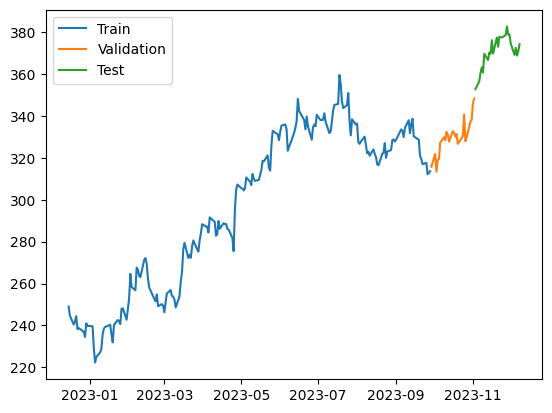

In [114]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

In [116]:
import tensorflow as tf
from sklearn.model_selection import train_test_split

# Assuming you already have the function df_to_windowed_df and windowed_df_to_date_X_y

# Assuming df is your original DataFrame
# ... (code to load or create df)

# Assuming 'df' is your DataFrame
windowed_df = df_to_windowed_df(df, '2022-12-12', '2023-12-08', n=3)

# Assuming 'windowed_df_to_date_X_y' is your function to convert windowed DataFrame to X, y
dates, X, y = windowed_df_to_date_X_y(windowed_df)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(50, activation='relu', input_shape=(X_train.shape[1], 1)),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Make predictions
predictions = model.predict(X_test)

# Evaluate the model
mse = tf.keras.metrics.mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse.numpy()}')


Epoch 1/50
7/7 [==============================] - 3s 86ms/step - loss: 90139.9531 - val_loss: 88088.4766
Epoch 2/50
7/7 [==============================] - 0s 16ms/step - loss: 87913.7266 - val_loss: 86081.2578
Epoch 3/50
7/7 [==============================] - 0s 16ms/step - loss: 86051.0625 - val_loss: 84333.8203
Epoch 4/50
7/7 [==============================] - 0s 14ms/step - loss: 84127.0156 - val_loss: 81847.9531
Epoch 5/50
7/7 [==============================] - 0s 15ms/step - loss: 80787.8047 - val_loss: 76046.8516
Epoch 6/50
7/7 [==============================] - 0s 15ms/step - loss: 74131.8984 - val_loss: 69157.6406
Epoch 7/50
7/7 [==============================] - 0s 16ms/step - loss: 65917.0156 - val_loss: 57329.4258
Epoch 8/50
7/7 [==============================] - 0s 13ms/step - loss: 50163.7266 - val_loss: 40518.7812
Epoch 9/50
7/7 [==============================] - 0s 14ms/step - loss: 36693.3359 - val_loss: 30070.0645
Epoch 10/50
7/7 [==============================] - 0s 1

7/7 [==============================] - 0s 5ms/step


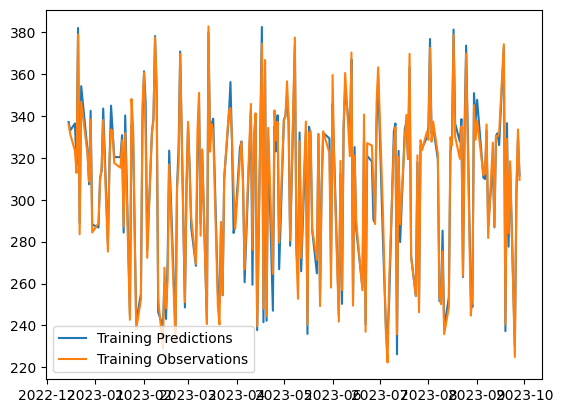

In [117]:
train_predictions = model.predict(X_train).flatten()

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

1/1 [==============================] - 0s 31ms/step


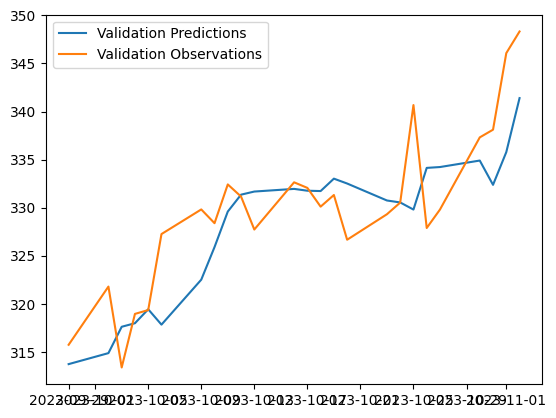

In [118]:
val_predictions = model.predict(X_val).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

In [123]:
test_predictions = model.predict(X_test).flatten()

test_predictions

2/2 [==============================] - 0s 8ms/step


array([254.11237, 241.201  , 332.63715, 288.2812 , 335.87915, 329.5674 ,
       319.23935, 310.833  , 236.50743, 376.4688 , 370.464  , 330.7502 ,
       377.70288, 324.29987, 273.00677, 344.87854, 332.3762 , 225.12088,
       333.59564, 235.52428, 329.29303, 233.39987, 324.0185 , 274.75763,
       341.39404, 338.39606, 317.62143, 237.04256, 246.22597, 305.93958,
       375.01135, 379.6363 , 335.71863, 237.25696, 374.175  , 229.70709,
       334.1906 , 314.8825 , 255.39821, 258.01044, 334.1386 , 319.4016 ,
       253.71559, 333.6325 , 223.93466, 332.886  , 276.6856 , 319.2233 ,
       266.2891 , 371.961  ], dtype=float32)

In [124]:
from copy import deepcopy

recursive_predictions = []
recursive_dates = np.concatenate([dates_val, dates_test])

for target_date in recursive_dates:
  last_window = deepcopy(X_train[-1])
  next_prediction = model.predict(np.array([last_window])).flatten()
  recursive_predictions.append(next_prediction)
  last_window[-1] = next_prediction

1/1 [==============================] - 0s 37ms/step
